In [32]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
import prettytable
from sklearn.metrics import accuracy_score

In [11]:
# reading the new file with all the features
from pandas import read_hdf
df_final_train_1 = read_hdf('data/fea_sample/storage_sample_stage5.h5', 'train_df',mode='r')
df_final_test_1 = read_hdf('data/fea_sample/storage_sample_stage5.h5', 'test_df',mode='r')

#reading the old file without the features
df_final_train_2 = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test_2 = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [12]:
print('The list of columns with new features: \n',df_final_train_1.columns)

The list of columns with new features: 
 Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_dot', 'svd_v_s_dot'],
      dtype='object')


In [13]:
print('The list of columns with old features: \n',df_final_train_2.columns)

The list of columns with old features: 
 Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')


In [14]:
y_train_1 = df_final_train_1.indicator_link
y_test_1 = df_final_test_1.indicator_link

y_train_2 = df_final_train_2.indicator_link
y_test_2= df_final_test_2.indicator_link

In [15]:
df_final_train_1.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test_1.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

df_final_train_2.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test_2.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

### Working on models with the Dataset which does not have Preferential Attachments and SVD Dot Features.

### Model 1: Random Forest

In [8]:
#Performing hyperparameter tuning to find the best hyperparameter
#Dataset with SVD Dot Features

from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25,return_train_score=True)

rf_random.fit(df_final_train_2,y_train_2)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96253376 0.96199906 0.96105488 0.96210591 0.9634686 ]
mean train scores [0.96306867 0.96260823 0.96145338 0.9626621  0.96426823]


In [9]:
pd.DataFrame(rf_random.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,9.392657,0.875246,0.110108,0.002008,14,51,125,117,"{'max_depth': 14, 'min_samples_leaf': 51, 'min...",0.962331,...,0.962492,0.962742,0.963802,0.963820,0.962531,0.962942,0.963149,0.963026,0.963069,0.000433
1,8.632363,0.465039,0.141307,0.096107,12,33,138,109,"{'max_depth': 12, 'min_samples_leaf': 33, 'min...",0.962752,...,0.962025,0.962653,0.962719,0.961302,0.963147,0.962761,0.961651,0.963016,0.962608,0.000727
2,7.905834,0.156778,0.134763,0.076741,11,56,179,106,"{'max_depth': 11, 'min_samples_leaf': 56, 'min...",0.960284,...,0.960406,0.961310,0.961617,0.961966,0.962080,0.961967,0.961169,0.961248,0.961453,0.000469
3,8.568655,0.634633,0.109086,0.000215,13,49,165,108,"{'max_depth': 13, 'min_samples_leaf': 49, 'min...",0.961866,...,0.961842,0.963184,0.963061,0.962746,0.962862,0.962777,0.961755,0.962796,0.962662,0.000454
4,9.781228,0.496849,0.109109,0.000206,14,28,111,121,"{'max_depth': 14, 'min_samples_leaf': 28, 'min...",0.963760,...,0.963748,0.964295,0.964129,0.964287,0.964084,0.963837,0.964381,0.965768,0.964268,0.000536


In [10]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                       n_estimators=121, n_jobs=-1, random_state=25)


In [16]:
clf_1 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

clf_1.fit(df_final_train_2,y_train_2)
y_train_pred_clf_1 = clf_1.predict(df_final_train_2)
y_test_pred_clf_1 = clf_1.predict(df_final_test_2)

In [70]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train_2,y_train_pred_clf_1))
print('Test f1 score',f1_score(y_test_2,y_test_pred_clf_1))
f1_train_clf_1=f1_score(y_train_2,y_train_pred_clf_1)
f1_test_clf_1=f1_score(y_test_2,y_test_pred_clf_1)

print('Train Accuracy score',accuracy_score(y_train_2,y_train_pred_clf_1))
print('Test Accuracy score',accuracy_score(y_test_2,y_test_pred_clf_1))

accuracy_score_train_clf_1=accuracy_score(y_train_2,y_train_pred_clf_1)
accuracy_score_test_clf_1=accuracy_score(y_test_2,y_test_pred_clf_1)

Train f1 score 0.9653138177100227
Test f1 score 0.9244905270700301
Train Accuracy score 0.9657806843863123
Test Accuracy score 0.9283428662853486


In [18]:
#Defining a function to plot the confusion matruix
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

###  Model 2: XGB Classifier

In [16]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,return_train_score=True)
random_cfl.fit(df_final_train_2,y_train_2)
print('mean test scores',random_cfl.cv_results_['mean_test_score'])
print('mean train scores',random_cfl.cv_results_['mean_train_score'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START colsample_bytree=0.5, learning_rate=0.15, max_depth=3, n_estimators=1000, subsample=0.5
[CV 1/5; 1/10] END colsample_bytree=0.5, learning_rate=0.15, max_depth=3, n_estimators=1000, subsample=0.5;, score=(train=0.997, test=0.984) total time= 3.3min
[CV 3/5; 2/10] START colsample_bytree=0.1, learning_rate=0.15, max_depth=10, n_estimators=1000, subsample=0.1
[CV 3/5; 2/10] END colsample_bytree=0.1, learning_rate=0.15, max_depth=10, n_estimators=1000, subsample=0.1;, score=(train=0.999, test=0.973) total time= 2.5min
[CV 1/5; 3/10] START colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.3
[CV 1/5; 3/10] END colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.3;, score=(train=0.983, test=0.978) total time= 1.1min
[CV 3/5; 3/10] START colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.3
[CV 3/5; 3/10] END colsampl

In [18]:
print(random_cfl.best_estimator_)

XGBClassifier(learning_rate=0.2, n_estimators=500, subsample=0.5)


In [19]:
clf_2=XGBClassifier(learning_rate=0.2, n_estimators=500, subsample=0.5)
clf_2.fit(df_final_train_2,y_train_2)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [20]:
y_train_pred_clf_2 = clf_2.predict(df_final_train_2)
y_test_pred_clf_2 = clf_2.predict(df_final_test_2)

In [59]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train_2,y_train_pred_clf_2))
print('Test f1 score',f1_score(y_test_2,y_test_pred_clf_2))

f1_train_clf_2=f1_score(y_train_2,y_train_pred_clf_2)
f1_test_clf_2=f1_score(y_test_2,y_test_pred_clf_2)

print('Train Accuracy score',accuracy_score(y_train_2,y_train_pred_clf_2))
print('Test Accuracy score',accuracy_score(y_test_2,y_test_pred_clf_2))

accuracy_score_train_clf_2=accuracy_score(y_train_2,y_train_pred_clf_2)
accuracy_score_test_clf_2=accuracy_score(y_test_2,y_test_pred_clf_2)

Train f1 score 1.0
Test f1 score 0.8902687877125617
Train Accuracy score 1.0
Test Accuracy score 0.8999840006399744


### Model on dataset with Preferential Attachments and SVD Dot Features

In [23]:
#Performing hyperparameter tuning to find the best hyperparameter
#Dataset with SVD Dot Features

from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf_3 = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf_3, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25,return_train_score=True)

rf_random.fit(df_final_train_1,y_train_1)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96488233 0.96350828 0.96224493 0.9642852  0.96654735]
mean train scores [0.96598196 0.96432662 0.96309787 0.96513029 0.9677532 ]


In [25]:
pd.DataFrame(rf_random.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,5.031847,0.800862,0.108330,0.000517,14,51,125,117,"{'max_depth': 14, 'min_samples_leaf': 51, 'min...",0.964944,...,0.966583,0.965733,0.965935,0.966009,0.965748,0.966067,0.965559,0.966853,0.965982,0.000406
1,4.533983,0.260250,0.132377,0.072052,12,33,138,109,"{'max_depth': 12, 'min_samples_leaf': 33, 'min...",0.963173,...,0.963689,0.963374,0.964447,0.966356,0.964058,0.964316,0.964277,0.964591,0.964327,0.000756
2,4.326625,0.415457,0.119538,0.033851,11,56,179,106,"{'max_depth': 11, 'min_samples_leaf': 56, 'min...",0.962475,...,0.961861,0.962594,0.963541,0.963440,0.963127,0.963965,0.963067,0.963185,0.963098,0.000581
3,4.438089,0.125134,0.121963,0.041015,13,49,165,108,"{'max_depth': 13, 'min_samples_leaf': 49, 'min...",0.964105,...,0.965024,0.964958,0.965664,0.964684,0.964808,0.965933,0.964668,0.966363,0.965130,0.000624
4,5.029863,0.132402,0.130158,0.065594,14,28,111,121,"{'max_depth': 14, 'min_samples_leaf': 28, 'min...",0.966495,...,0.968066,0.967329,0.967000,0.968375,0.967632,0.967013,0.968985,0.967558,0.967753,0.000580


In [26]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                       n_estimators=121, n_jobs=-1, random_state=25)


In [22]:
clf_3 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

clf_3.fit(df_final_train_1,y_train_1)
y_train_pred_clf_3 = clf_3.predict(df_final_train_1)
y_test_pred_clf_3 = clf_3.predict(df_final_test_1)

In [66]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train_1,y_train_pred_clf_3))
print('Test f1 score',f1_score(y_test_1,y_test_pred_clf_3))
f1_train_clf_3=f1_score(y_train_1,y_train_pred_clf_3)
f1_test_clf_3=f1_score(y_test_1,y_test_pred_clf_3)

print('Train Accuracy score',accuracy_score(y_train_1,y_train_pred_clf_3))
print('Test Accuracy score',accuracy_score(y_test_1,y_test_pred_clf_3))

accuracy_train_clf_3=accuracy_score(y_train_1,y_train_pred_clf_3)
accuracy_test_clf_3=accuracy_score(y_test_1,y_test_pred_clf_3)

Train f1 score 0.967855516770375
Test f1 score 0.928203510984968
Train Accuracy score 0.9682306353872923
Test Accuracy score 0.9317027318907244


In [ ]:
#Lets plot confusion matrix after working on the new dataset first and then compare them

In [29]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,return_train_score=True)
random_cfl.fit(df_final_train_1,y_train_1)
print('mean test scores',random_cfl.cv_results_['mean_test_score'])
print('mean train scores',random_cfl.cv_results_['mean_train_score'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.1
[CV 1/5; 1/10] END colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.1;, score=(train=0.976, test=0.976) total time=   7.6s
[CV 2/5; 2/10] START colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.1
[CV 2/5; 2/10] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.1;, score=(train=0.974, test=0.975) total time=  44.8s
[CV 2/5; 3/10] START colsample_bytree=0.1, learning_rate=0.03, max_depth=3, n_estimators=1000, subsample=0.1
[CV 2/5; 3/10] END colsample_bytree=0.1, learning_rate=0.03, max_depth=3, n_estimators=1000, subsample=0.1;, score=(train=0.970, test=0.973) total time=  47.7s
[CV 5/5; 3/10] START colsample_bytree=0.1, learning_rate=0.03, max_depth=3, n_estimators=1000, subsample=0.1
[CV 5/5; 3/10] END colsampl

[CV 4/5; 1/10] START colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.1
[CV 4/5; 1/10] END colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.1;, score=(train=0.976, test=0.976) total time=   7.6s
[CV 1/5; 2/10] START colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.1
[CV 1/5; 2/10] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.1;, score=(train=0.975, test=0.973) total time=  44.3s
[CV 5/5; 2/10] START colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.1
[CV 5/5; 2/10] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.1;, score=(train=0.975, test=0.973) total time=  42.1s
[CV 4/5; 3/10] START colsample_bytree=0.1, learning_rate=0.03, max_depth=3, n_estimators=1000, subsample=0.1
[CV 4/5; 3/10] END colsample_bytree=0.1, learning_rate=0.03, max_depth=3, n_estimators=1

In [30]:
print(random_cfl.best_estimator_)

XGBClassifier(learning_rate=0.03, max_depth=5, n_estimators=2000, subsample=0.5)


In [24]:
clf_4=XGBClassifier(learning_rate=0.03, n_estimators=2000,max_depth=5, subsample=0.5)
clf_4.fit(df_final_train_1,y_train_1)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.03, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=2000, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [25]:
y_train_pred_clf_4 = clf_4.predict(df_final_train_1)
y_test_pred_clf_4 = clf_4.predict(df_final_test_1)

In [65]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train_1,y_train_pred_clf_4))
print('Test f1 score',f1_score(y_test_1,y_test_pred_clf_4))
f1_train_clf_4=f1_score(y_train_1,y_train_pred_clf_4)
f1_test_clf_4=f1_score(y_test_1,y_test_pred_clf_4)

print('Train Acurracy score',accuracy_score(y_train_1,y_train_pred_clf_4))
print('Test Acurracy score',accuracy_score(y_test_1,y_test_pred_clf_4))

accuracy_score_train_clf_4=accuracy_score(y_train_1,y_train_pred_clf_4)
accuracy_score_test_clf_4=accuracy_score(y_test_1,y_test_pred_clf_4)

Train f1 score 0.9956129807692308
Test f1 score 0.9020049853690256
Train Acurracy score 0.995620087598248
Test Acurracy score 0.9095836166553338


#### Comparing the following for each model for dataset with additional features and non-additional features
- ROC Curve
- Confusion Matrix
- F1 Score
- Accuracy
- TPR, FPR
- Feature Importance in each of the models

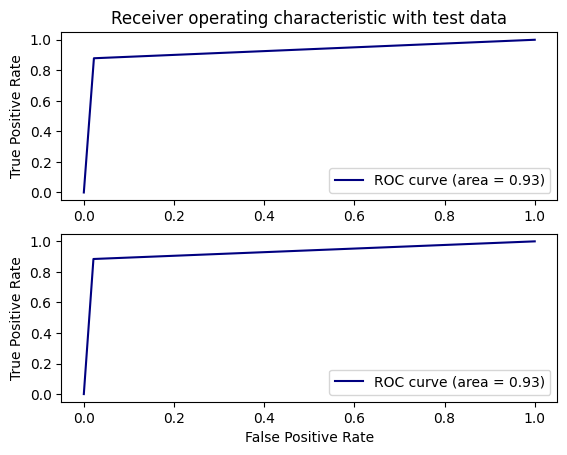

In [61]:
#Comparing the ROC Curves for the model with Random Forest

from sklearn.metrics import roc_curve, auc
fpr_clf_1,tpr_clf_1,ths_clf_1 = roc_curve(y_test_1,y_test_pred_clf_1)
auc_clf_1 = auc(fpr_clf_1, tpr_clf_1)

fpr_clf_3,tpr_clf_3,ths_clf_3 = roc_curve(y_test_2,y_test_pred_clf_3)
auc_clf_3 = auc(fpr_clf_3, tpr_clf_3)

plt.subplot(211)

plt.title('Receiver operating characteristic with test data')
plt.ylabel('True Positive Rate')
plt.plot(fpr_clf_1, tpr_clf_1, color='navy',label='ROC curve (area = %0.2f)' % auc_clf_1)
plt.legend()

plt.subplot(212)
plt.plot(fpr_clf_3, tpr_clf_3, color='navy',label='ROC curve (area = %0.2f)' % auc_clf_3)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

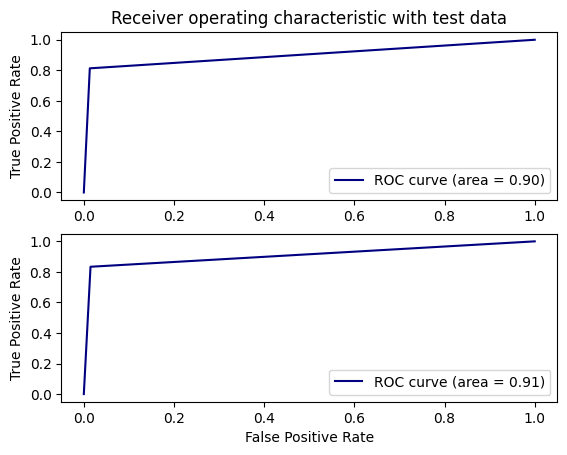

In [62]:
#Comparing the ROC Curves for the model with XGBoost

from sklearn.metrics import roc_curve, auc
fpr_clf_2,tpr_clf_2,ths_clf_2 = roc_curve(y_test_2,y_test_pred_clf_2)
auc_clf_2 = auc(fpr_clf_2, tpr_clf_2)

fpr_clf_4,tpr_clf_4,ths_clf_4 = roc_curve(y_test_2,y_test_pred_clf_4)
auc_clf_4 = auc(fpr_clf_4, tpr_clf_4)

plt.subplot(211)

plt.title('Receiver operating characteristic with test data')
plt.ylabel('True Positive Rate')
plt.plot(fpr_clf_2, tpr_clf_2, color='navy',label='ROC curve (area = %0.2f)' % auc_clf_2)
plt.legend()

plt.subplot(212)
plt.plot(fpr_clf_4, tpr_clf_4, color='navy',label='ROC curve (area = %0.2f)' % auc_clf_4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [49]:
fpr_clf_2[1]

0.013255609678192127

Train confusion_matrix for Random Forest Model with old features


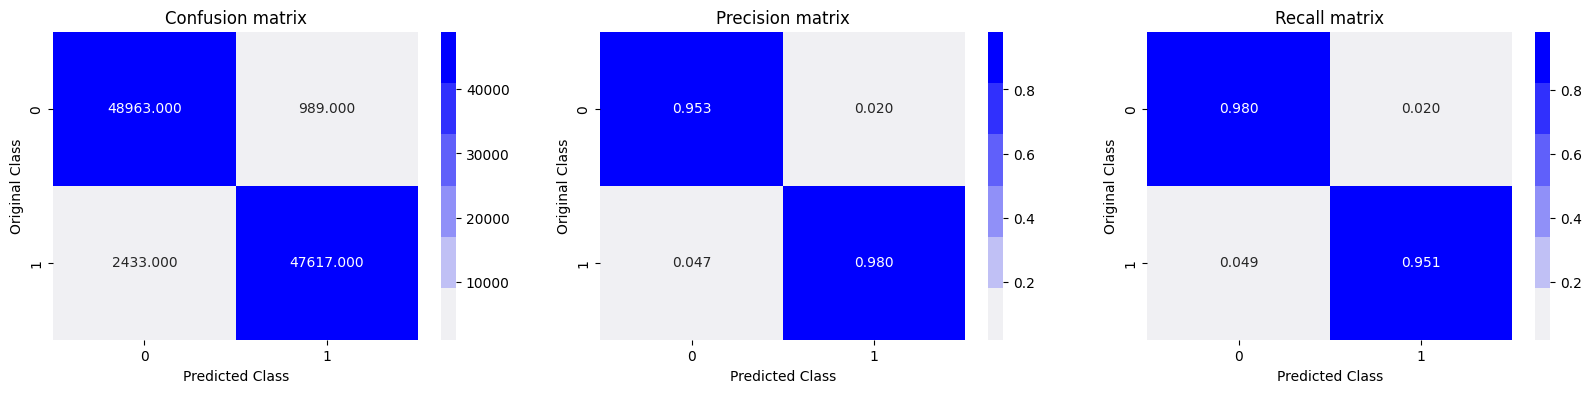

Train confusion_matrix for Random Forest Model with new features


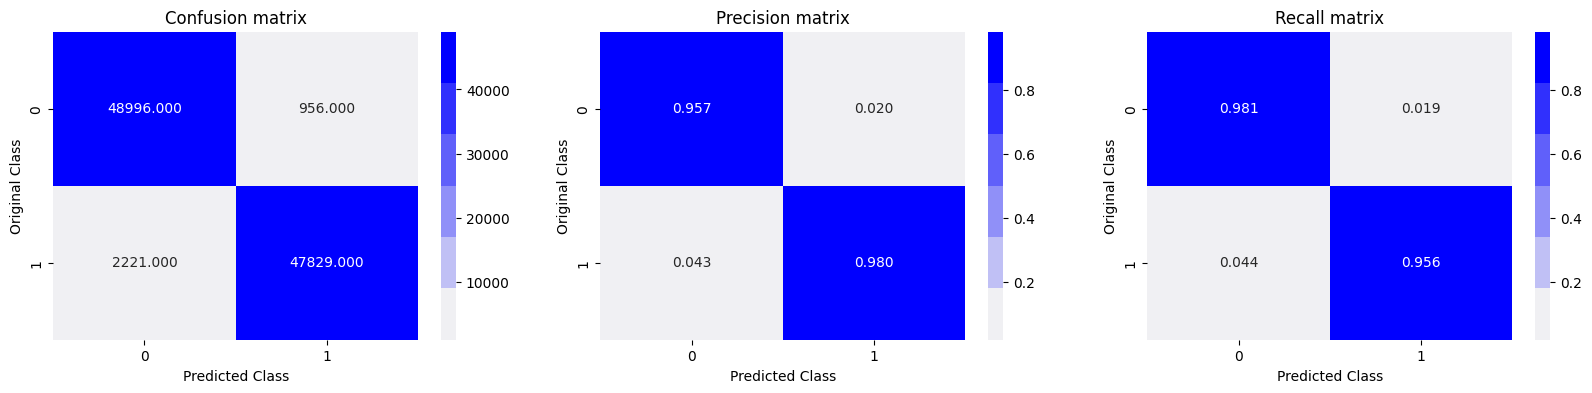

In [30]:
#Confusion Matrix
print('Train confusion_matrix for Random Forest Model with old features')
plot_confusion_matrix(y_train_2,y_train_pred_clf_1)
print('Train confusion_matrix for Random Forest Model with new features')
plot_confusion_matrix(y_train_1,y_train_pred_clf_3)

Test confusion_matrix for Random Forest Model with old features


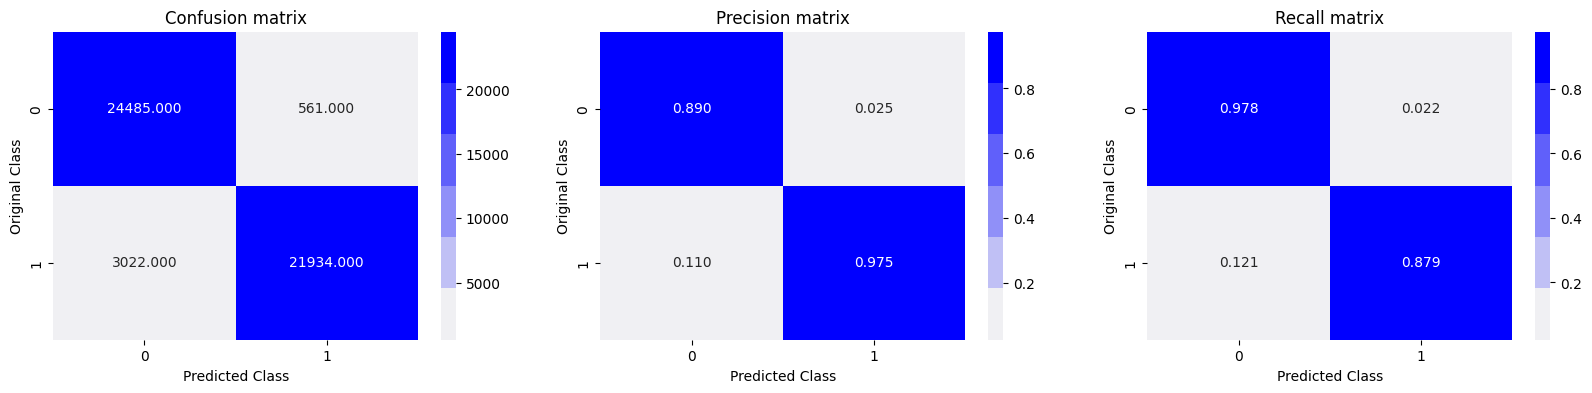

Test confusion_matrix for Random Forest Model with new features


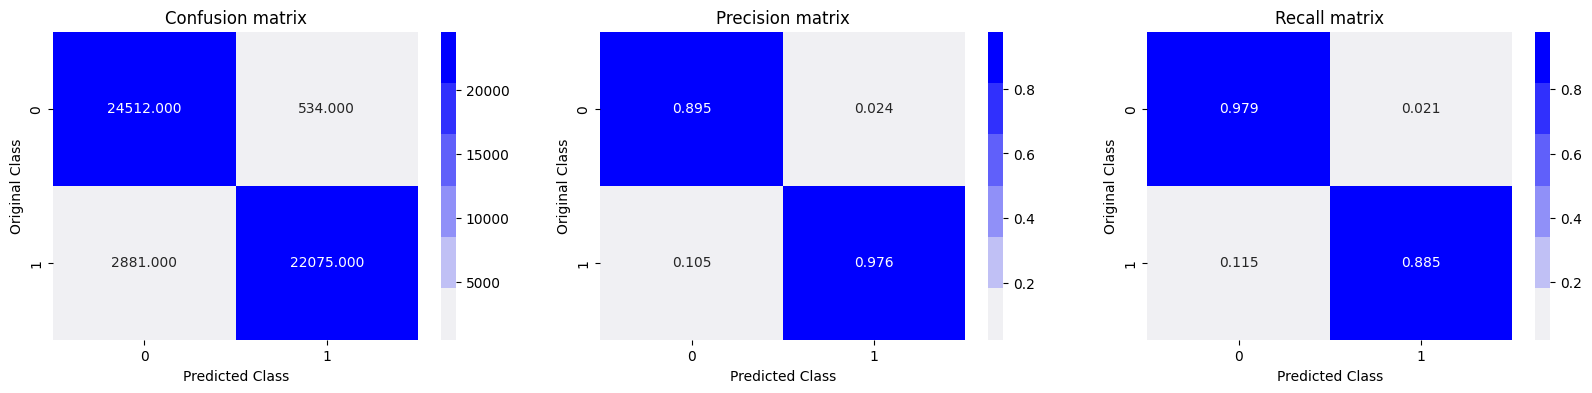

In [76]:
#Confusion Matrix
print('Test confusion_matrix for Random Forest Model with old features')
plot_confusion_matrix(y_test_2,y_test_pred_clf_1)
print('Test confusion_matrix for Random Forest Model with new features')
plot_confusion_matrix(y_test_1,y_test_pred_clf_3)

Train confusion_matrix for XGBoost with Old Features


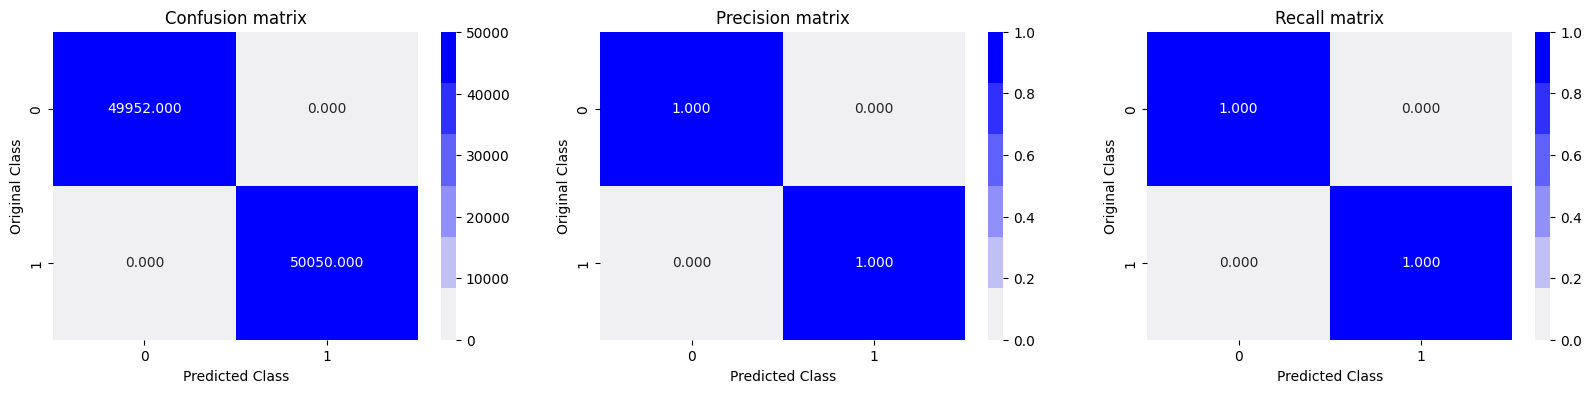

Train confusion_matrix for XGBoost with New Features


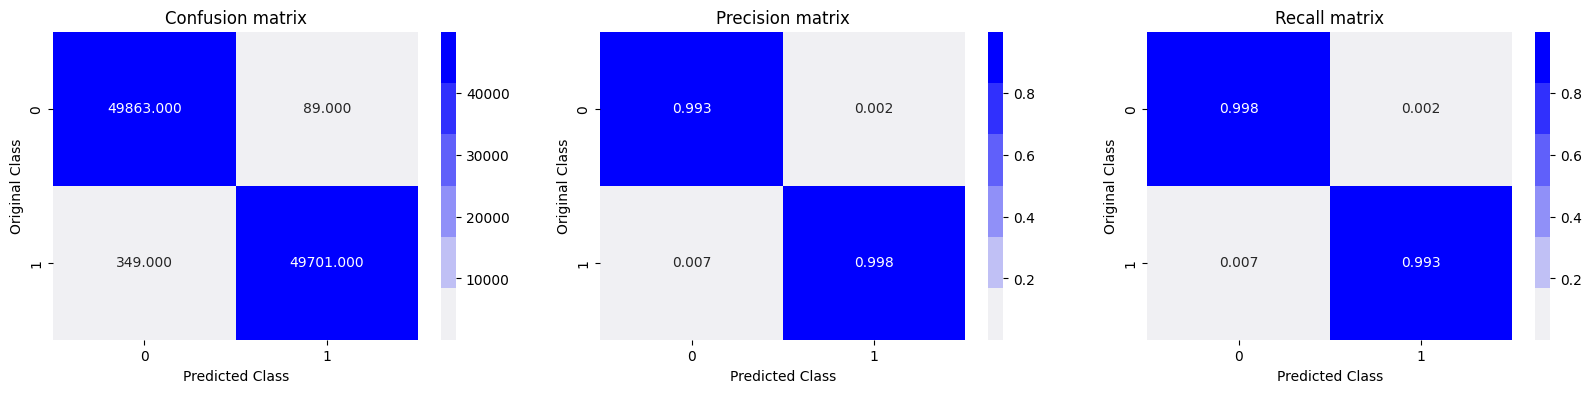

In [78]:
#Confusion Matrix
print('Train confusion_matrix for XGBoost with Old Features')
plot_confusion_matrix(y_train_2,y_train_pred_clf_2)
print('Train confusion_matrix for XGBoost with New Features')
plot_confusion_matrix(y_train_1,y_train_pred_clf_4)

Test confusion_matrix for XGBoost Model with old features


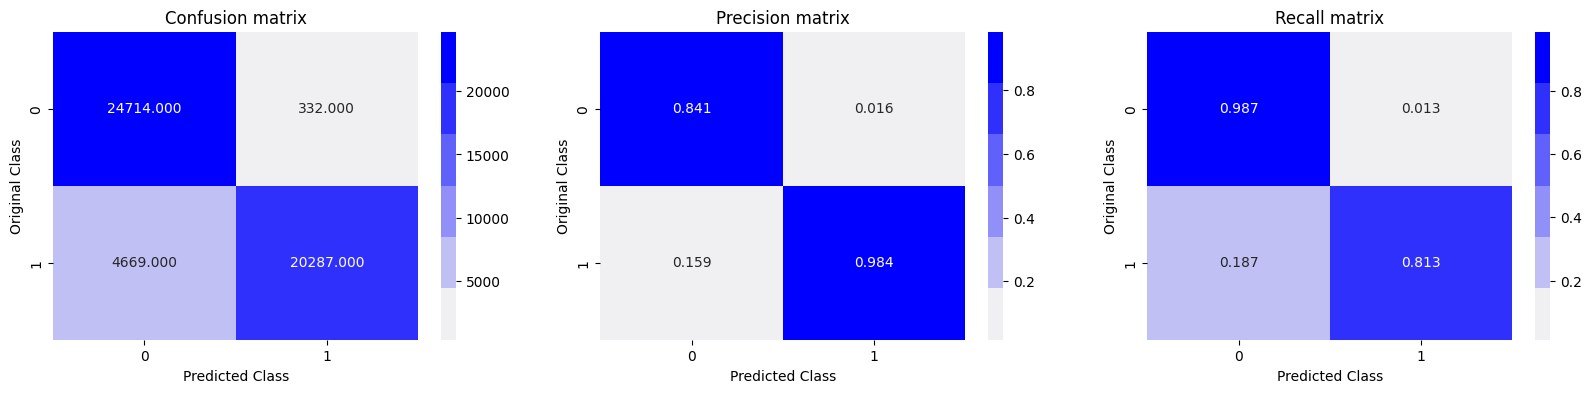

Test confusion_matrix for XGBoost Model with new features


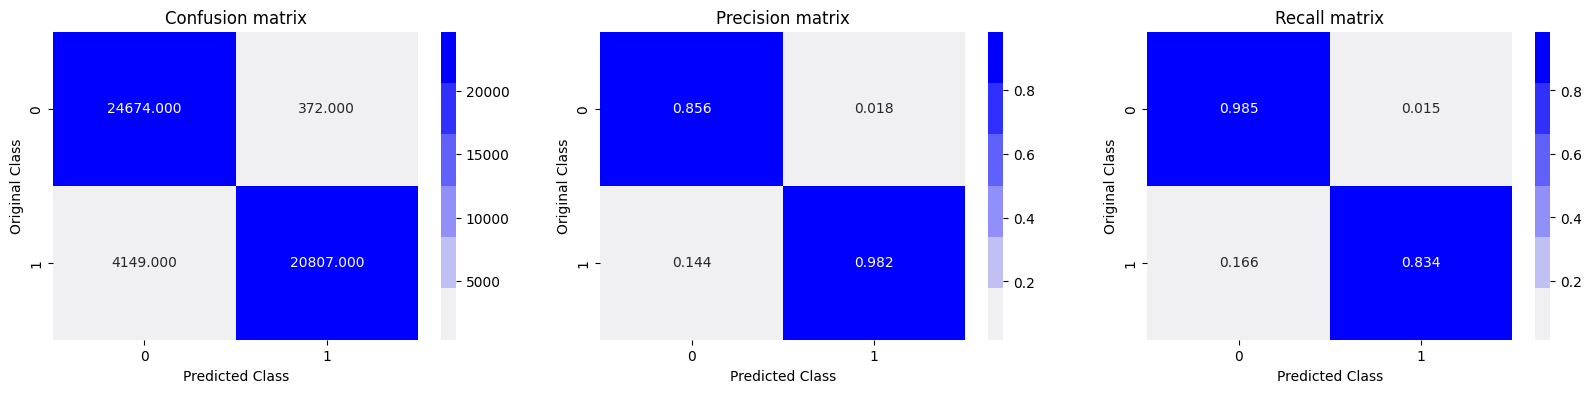

In [79]:
#Confusion Matrix
print('Test confusion_matrix for XGBoost Model with old features')
plot_confusion_matrix(y_test_2,y_test_pred_clf_2)
print('Test confusion_matrix for XGBoost Model with new features')
plot_confusion_matrix(y_test_1,y_test_pred_clf_4)

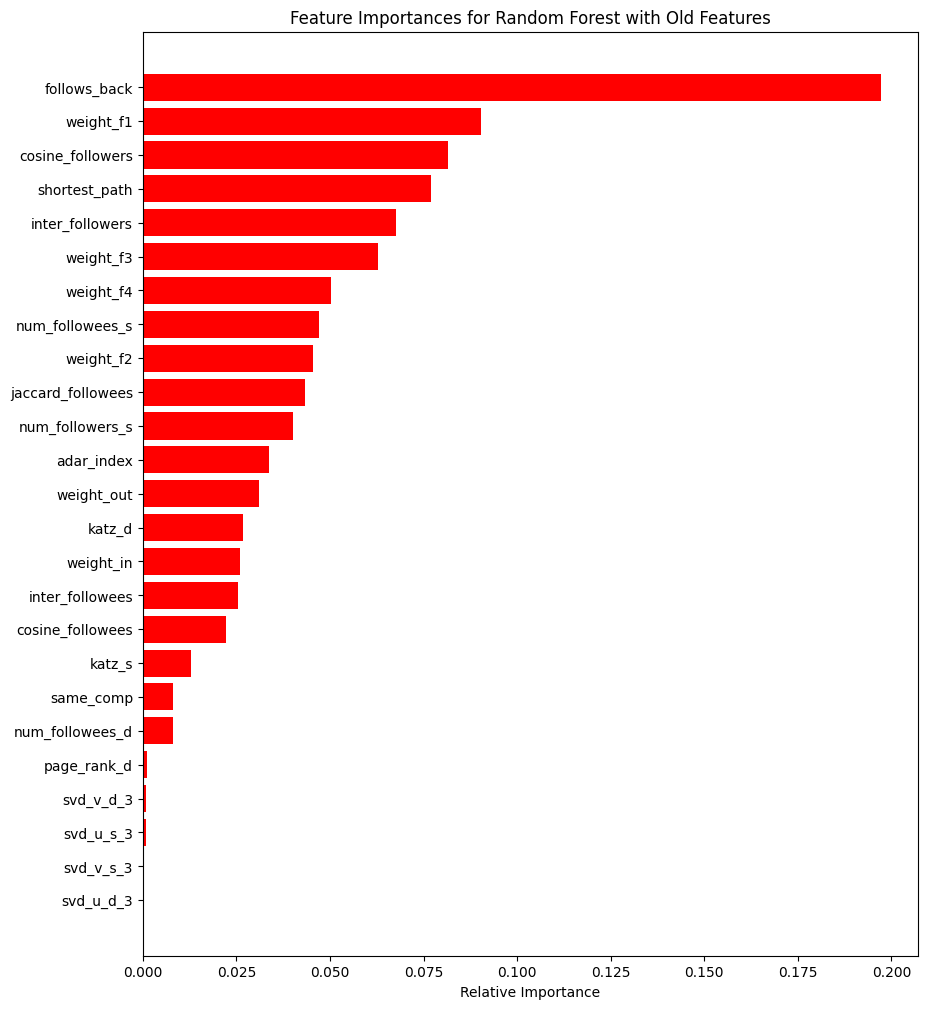

In [80]:
features = df_final_train_2.columns
importances = clf_1.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances for Random Forest with Old Features')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

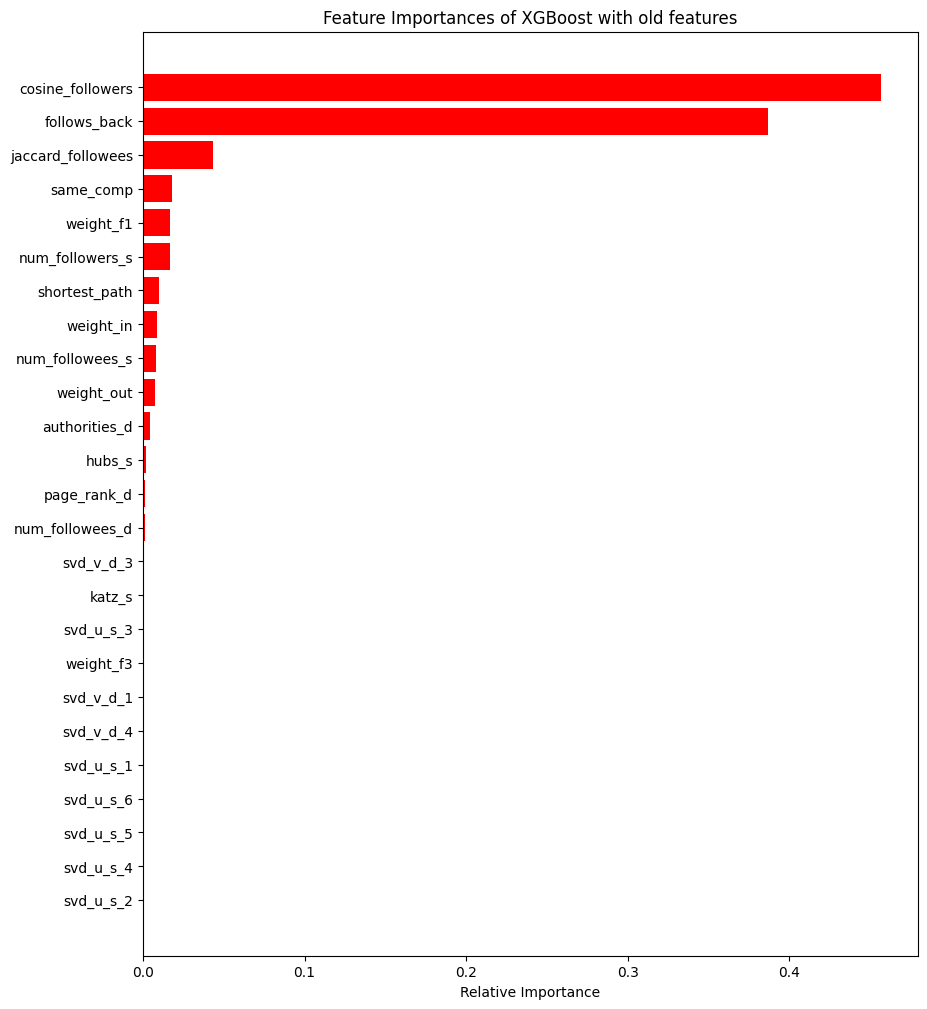

In [81]:
features = df_final_train_2.columns
importances = clf_2.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances of XGBoost with old features')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

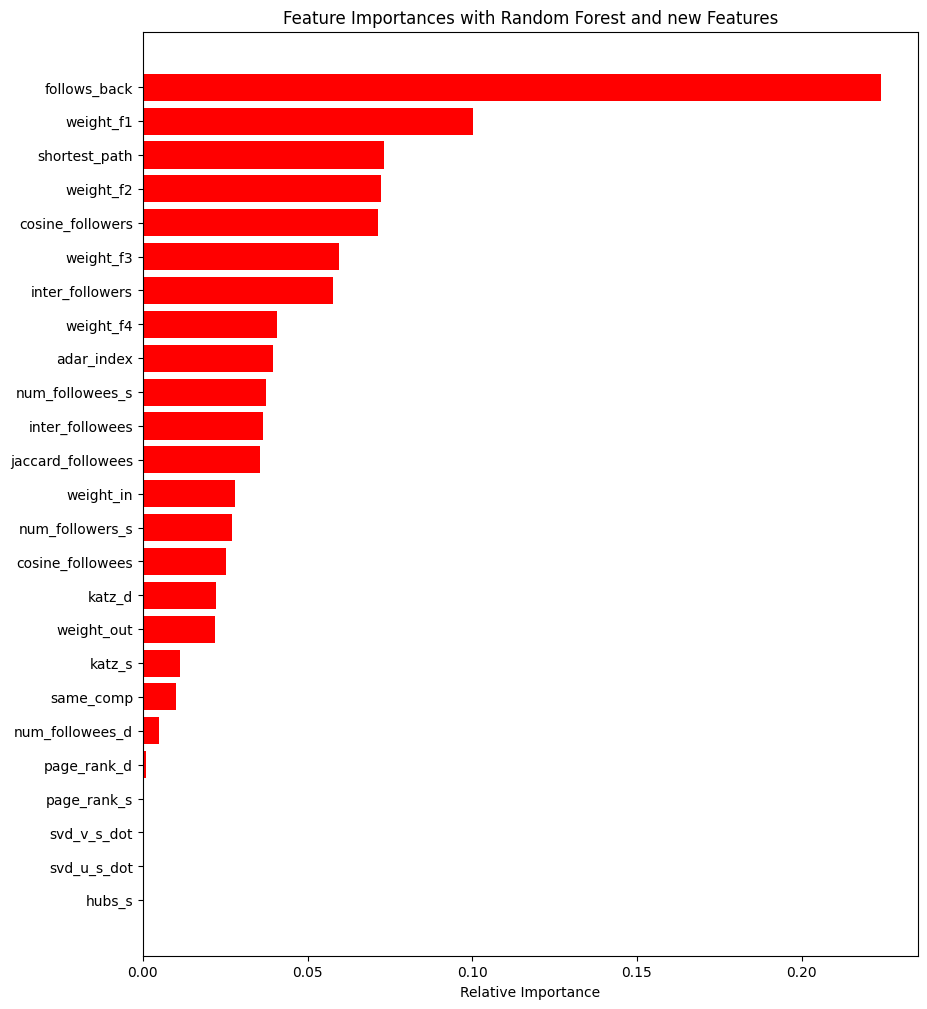

In [82]:
features = df_final_train_1.columns
importances = clf_3.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances with Random Forest and new Features')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

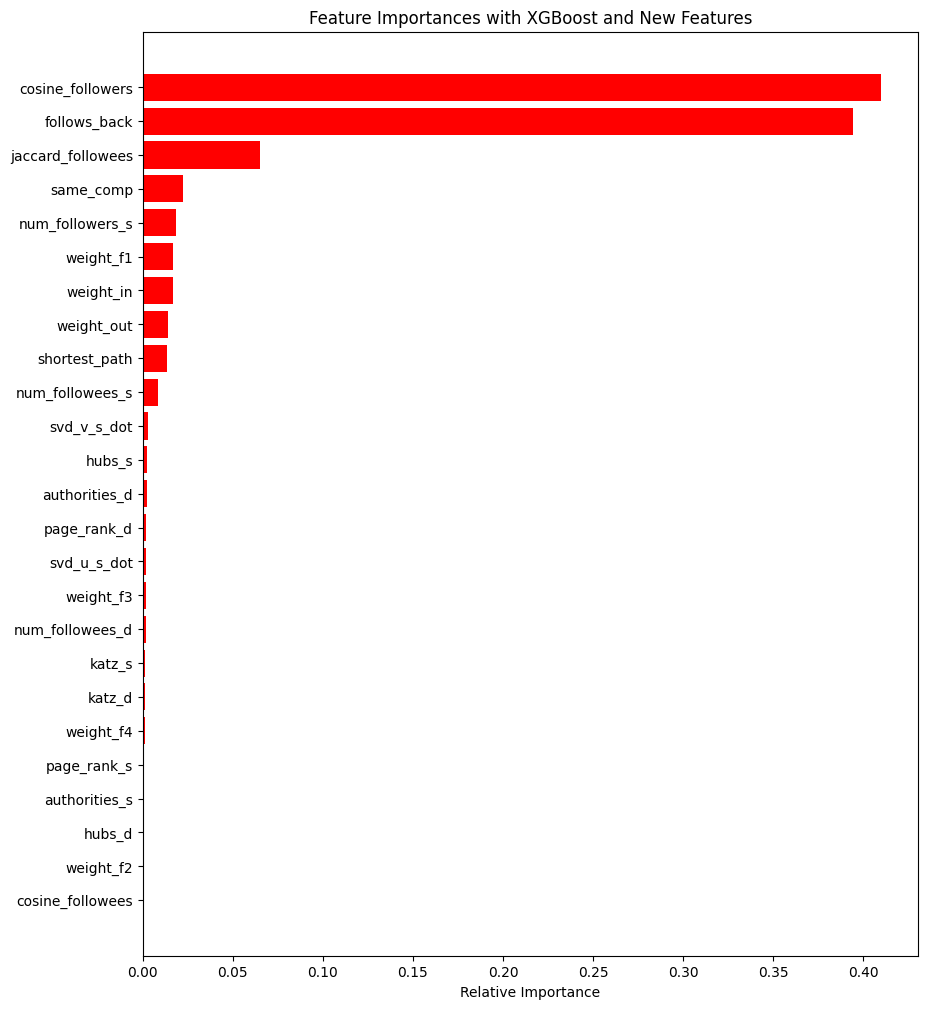

In [83]:
features = df_final_train_1.columns
importances = clf_4.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances with XGBoost and New Features')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [75]:
#Accuracy of each model
#F1 Score
#TP
#FP
#AUC Score
from prettytable import PrettyTable

t=PrettyTable()

t.field_names=['Model Name','Metric','Old Features Value', 'New Features Value']

t.add_row(['Random Forest','Train Accuracy',accuracy_train_clf_1, accuracy_train_clf_3 ])
t.add_row(['Random Forest','Test Accuracy',accuracy_test_clf_1,accuracy_test_clf_3 ])
t.add_row(['Random Forest','TP',tpr_clf_1[1], tpr_clf_3[1]])
t.add_row(['Random Forest','Test FP', fpr_clf_1[1],fpr_clf_3[1]])
t.add_row(['Random Forest','AUC',auc_clf_1, auc_clf_3 ])
t.add_row(['Random Forest','Test F1 Score',f1_train_clf_1, f1_train_clf_3 ])
t.add_row(['Random Forest','Train F1 Score',f1_test_clf_1,f1_test_clf_3 ])

t.add_row(['XGBoost','Train Accuracy',accuracy_score_train_clf_2, accuracy_score_train_clf_4 ])
t.add_row(['XGBoost','Test Accuracy',accuracy_score_test_clf_2,accuracy_score_test_clf_4 ])
t.add_row(['XGBoost','TP',tpr_clf_2[1], tpr_clf_4[1]])
t.add_row(['XGBoost','Test FP', fpr_clf_2[1],fpr_clf_4[1]])
t.add_row(['XGBoost','AUC',auc_clf_2, auc_clf_4 ])
t.add_row(['XGBoost','Test F1 Score',f1_train_clf_2, f1_train_clf_4 ])
t.add_row(['XGBoost','Train F1 Score',f1_test_clf_2,f1_test_clf_4 ])

print(t)

+---------------+----------------+----------------------+----------------------+
|   Model Name  |     Metric     |  Old Features Value  |  New Features Value  |
+---------------+----------------+----------------------+----------------------+
| Random Forest | Train Accuracy |  0.9657806843863123  |  0.9682306353872923  |
| Random Forest | Test Accuracy  |  0.9283428662853486  |  0.9317027318907244  |
| Random Forest |       TP       |  0.8789068761019394  |  0.8845568200032057  |
| Random Forest |    Test FP     | 0.02239878623333067  | 0.02132076978359818  |
| Random Forest |      AUC       |  0.9282540449343043  |  0.9316180251098037  |
| Random Forest | Test F1 Score  |  0.9653138177100227  |  0.967855516770375   |
| Random Forest | Train F1 Score |  0.9244905270700301  |  0.928203510984968   |
|    XGBoost    | Train Accuracy |         1.0          |  0.995620087598248   |
|    XGBoost    | Test Accuracy  |  0.8999840006399744  |  0.9095836166553338  |
|    XGBoost    |       TP  

### Conclusion
- The Confusion Matrix clearly shows that the classification has improved for the Random Forest Model, but has not improved for the XGBoost Models. Based on which I learned that a single feature need not be helpful for all model, but may improve the performance for some model and may decrease for other models.
- The AUC Score has improved for both the models, Random Forest and XGBoost.
- The precision and recall has improved for the Random Forest model when we have used the new features preferential Attachments and SVD Dot Features.
- The Recall alone has improved for XGBoost when we have used the new features preferential Attachments and SVD Dot Features.

- An important conclusion, which can be observed from the Data is that Random Forest is a better model than XGBoost for our application and should be preferred over XGBoost.
- The Feature Importance has changed for different models.

#### Steps followed
- As a start I read through the article and the paper to understand what is the problem about and what features have already been derived and the research that has gone into it.
- Then I wrote down what are these features and how they are calculated.
- Then read through every code to understand, how the already coded features have been coded.
- Then I used the same syntax to create functions for the features preferential attachments and SVD features.
- Then I had hypertuned the model, and have plotted the results.